### **Importing Dataset**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

### **Exploring Data**

In [ ]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
1931,7409-JURKQ,Female,0,Yes,No,53,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),111.80,5809.75,No
3670,5442-BXVND,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),24.25,838.5,No
2041,3546-GHEAE,Male,0,No,No,7,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.45,165.35,No
4568,3709-OIJEA,Male,0,No,No,26,Yes,No,Fiber optic,No,...,Yes,Yes,No,No,One year,Yes,Electronic check,85.20,2184.6,No


In [ ]:
df.drop('customerID',axis='columns',inplace = True)
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [ ]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [ ]:
df1.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


<ipython-input-31-b67e0c3d31a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [ ]:
df1.TotalCharges.dtypes

dtype('float64')

### **Visualtization**

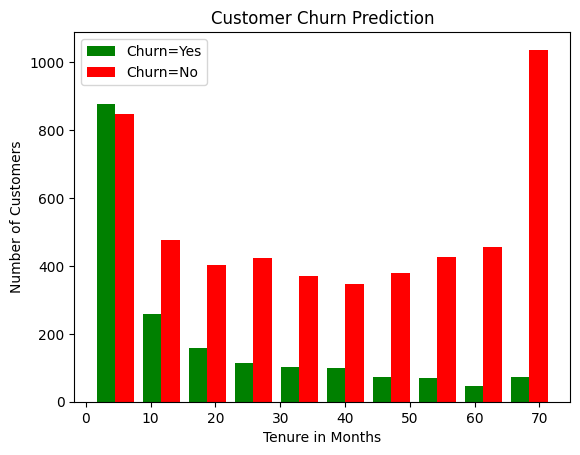

In [ ]:
tenure_churn_No = df1[df1.Churn=='No'].tenure
tenure_churn_Yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel('Tenure in Months')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction')
plt.hist([tenure_churn_Yes, tenure_churn_No], color=['green','red'], label=['Churn=Yes','Churn=No'])
plt.legend()

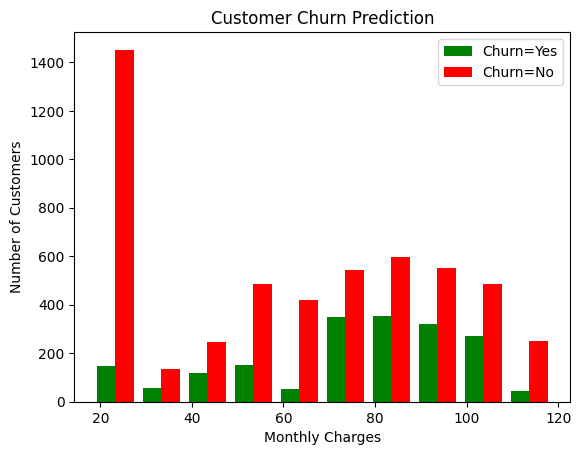

In [ ]:
monthly_charges_No = df1[df1.Churn=='No'].MonthlyCharges
monthly_charges_Yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction')
plt.hist([monthly_charges_Yes, monthly_charges_No],color=['Green','Red'], label=['Churn=Yes','Churn=No'])
plt.legend()

### **Label Encoding**

In [ ]:
#Function for getting unique values
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes=='object':
        print(f'{column} : {df[column].unique()}')

In [ ]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
#Simplifying data
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

<ipython-input-52-20fb46cc7584>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
<ipython-input-52-20fb46cc7584>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [ ]:
print_unique_col_values(df1)

MultipleLines : ['No' 0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1 'No']
OnlineBackup : [1 0 'No']
DeviceProtection : [0 1 'No']
TechSupport : [0 1 'No']
StreamingTV : [0 1 'No']
StreamingMovies : [0 1 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
#Encoding Categorical Data To Binary Data [0,1]
yes_no_cols = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for column in yes_no_cols:
      df1[column].replace({'Yes':1,'No':0}, inplace=True)

<ipython-input-54-c1ff05757a6b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[column].replace({'Yes':1,'No':0}, inplace=True)
<ipython-input-54-c1ff05757a6b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column].replace({'Yes':1,'No':0}, inplace=True)
<ipython-input-54-c1ff05757a6b>:5: FutureWarning: Downcasting behavior in `repl

In [ ]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

In [ ]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace = True)

<ipython-input-77-0d55a7e00b11>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1, 'Male':0}, inplace = True)
<ipython-input-77-0d55a7e00b11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1, 'Male':0}, inplace = True)


In [ ]:
df1['gender'].unique()

array([1, 0])

In [ ]:
#One Hot Encoding
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod']).astype(int)
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1587,0,0,1,1,48,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2184,1,1,0,0,2,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3597,0,0,1,0,25,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
5930,1,0,0,0,72,1,1,1,0,0,...,0,1,0,0,0,1,1,0,0,0


In [ ]:
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [ ]:
#Scaling Columns
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
# Displaying data
for cols in df2:
  print(f'{cols} : {df2[cols].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

### **Train & Test Split**

In [ ]:
x = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)


In [ ]:
x_train.shape

(5625, 26)

In [ ]:
x_test.shape

(1407, 26)

In [ ]:
len(x_train.columns)

26

In [ ]:
# Creating ANN
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation ='relu'),
    keras.layers.Dense(1, activation ='sigmoid')
])

model.compile(optimizer ='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 100)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7211 - loss: 0.5599
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8011 - loss: 0.4335
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7992 - loss: 0.4264
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8109 - loss: 0.4116
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8079 - loss: 0.4192
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7954 - loss: 0.4144
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8044 - loss: 0.4174
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8069 - loss: 0.4129
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8112 - loss: 0.4028
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7979 - loss: 0.4148
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8052 - loss: 0.4156
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

### **Model Evaluation**

In [ ]:
model.evaluate(x_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8077 - loss: 0.4403


[0.44966837763786316, 0.7882018685340881]

In [ ]:
y_predict = model.predict(x_test)
y_predict[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.28217298],
       [0.41689688],
       [0.00847136],
       [0.77218664],
       [0.6141879 ]], dtype=float32)

In [ ]:
y_test[:10]

,Churn
2660,0
744,0
5579,1
64,1
3287,1
816,1
2670,0
5920,0
1023,0
6087,0


In [ ]:
#Converting predicted continuous values into 1 and 0
y_pred = []
for element in y_predict:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 1, 0, 0]

In [ ]:
# Preformance Evaluation Metrics [confusion matrix]
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       999
           1       0.65      0.58      0.61       408

    accuracy                           0.79      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

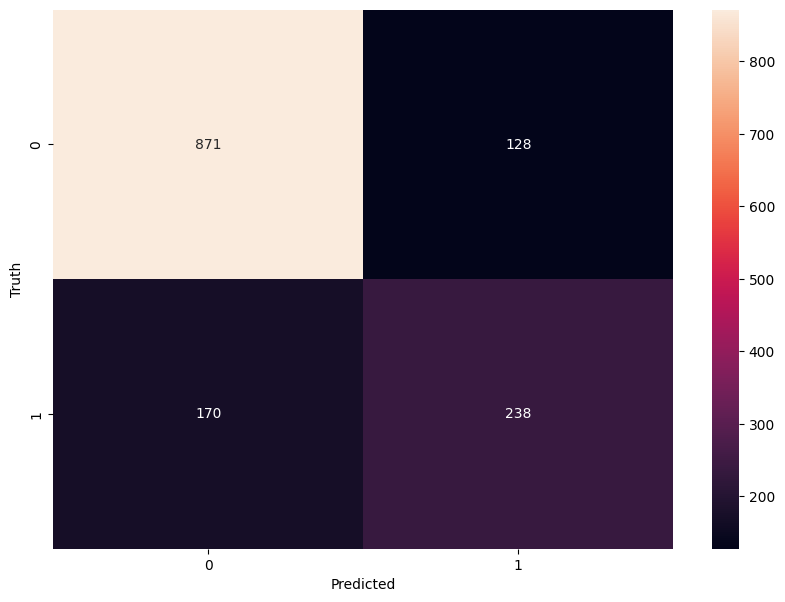

In [ ]:
# Heat Map Visualization of confusion Matrix
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')